<a href="https://colab.research.google.com/github/Aamaniharika/EDA-project-/blob/main/Airbnb_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 

# **Air bnb Booking Analysis**

# **Project Summary -**

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.
This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

# **GitHub Link -**

https://github.com/Aamaniharika/eda-project/upload/main

# **Problem Statement**


what are different property listed in each neighbourhood group?

what are different  room types available  by most of  host with respective neighbourhood?

what are the most expensive properties at neighbourhood group?


what is mostly available property in each neighbourhood?

#### **Define Your Business Objective?**

Data Forecast showing  future demand for various roomtypes and preferred locations for business expansion based on various parameters



# ***Let's Begin !***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
#url='https://drive.google.com/file/d/1ioU5r9KEYSfwgfUi22SclVkx4l1a_8ou/view?usp=share_link'
file_path='/content/drive/MyDrive/csvfiles/Copy of Airbnb NYC 2019.csv'
df=pd.read_csv(file_path)

### Dataset First View

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.columns.unique()

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df.shape[0]

48895

In [ ]:
df.shape[1]

16

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

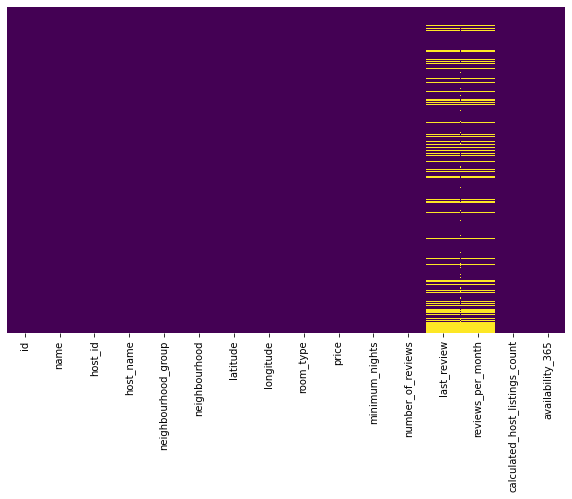

In [ ]:
import matplotlib
# Visualizing the missing values
matplotlib.rcParams['figure.figsize']=(10,6)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Figure size 720x432 with 0 Axes>

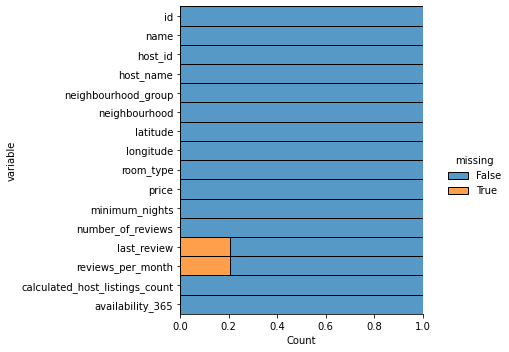

In [ ]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)


percentage of null values

In [ ]:
(df.isnull().sum()/len(df))*100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
df= df.drop(df[(df['minimum_nights']>365)].index)
df= df.drop(df[(df['number_of_reviews']>500)].index)
df= df.drop(df[(df['calculated_host_listings_count']>100)].index)
df= df.drop(df[(df['price']>1800)].index)
df= df.drop(df[(df['price']<1)].index)

df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.796200e+04,4.796200e+04,47962.000000,47962.000000,47962.000000,47962.000000,47962.000000,38438.000000,47962.000000,47962.000000
mean,1.885598e+07,6.635704e+07,40.728804,-73.951599,142.747571,6.519599,23.580668,1.372987,3.395563,109.856365
std,1.095187e+07,7.811386e+07,0.054881,0.046162,131.386068,16.096102,44.306458,1.679036,9.914673,130.402201
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.381501e+06,7.603955e+06,40.689620,-73.982420,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.947165e+07,2.986915e+07,40.722800,-73.955260,105.000000,2.000000,5.000000,0.710000,1.000000,41.000000
75%,2.881982e+07,1.044658e+08,40.763317,-73.935823,175.000000,5.000000,24.000000,2.020000,2.000000,217.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,1800.000000,365.000000,488.000000,58.500000,96.000000,365.000000


### What did you know about your dataset?

the data provided has 48895 rows and 16 unique columns ,from basic analysis we can see there are 20% of null values in both columns reviews_per_month  and last_review

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns.unique()

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### Variables Description 

•	NAME

•	HOST_ID

•	HOST_NAME

•	NEIGHBOURHOOD_GROUP

•	NEIGHBOURHOOD

•	LATITUDE

•	LONGITUDE

•	ROOM_TYPE

•	PRICE

•	MINIMUM_NIGHTS

•	NUMBER_OF_REVIEWS

•	LAST_REVIEW

•	REVIEWS_PER_MONTH

•	CALCULATED_HOST_LISTINGS_COUNT

•	AVAILABILITY_365



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64


unique host_id-From Unique Counts above we can see that in this dataset there are 37457 unique hosts renting out a total number of 48895 properties
---



In [ ]:
df.rename(columns = {
    'calculated_host_listings_count': 'host_listings_count',
    'number_of_reviews': 'reviews_count'
}, inplace = True)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_count,last_review,reviews_per_month,host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


top 10 hosts with most of properties

In [ ]:
top_10_hosts_with_most_properties = df.host_id.value_counts().head(10)
top_10_hosts_with_most_properties

61391963     79
16098958     61
7503643      49
190921808    46
1475015      42
120762452    40
2119276      39
22541573     39
205031545    34
119669058    34
Name: host_id, dtype: int64

Text(0.5, 1.0, 'No of choices per Room Type')

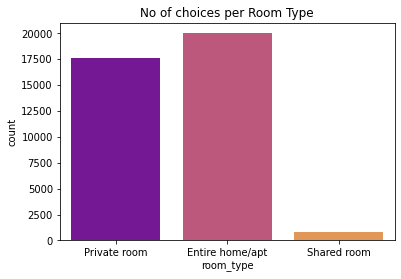

In [ ]:
#most preferred choice by room type
df['room_type'].value_counts()
sns.countplot(x='room_type',data=df, palette="plasma")
plt.title('No of choices per Room Type')


from above bar graph we can see most preferred type is entire home/apt

In [ ]:
neighbourhoods_group_with_most_properties = df.neighbourhood_group.value_counts()
neighbourhoods_group_with_most_properties

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

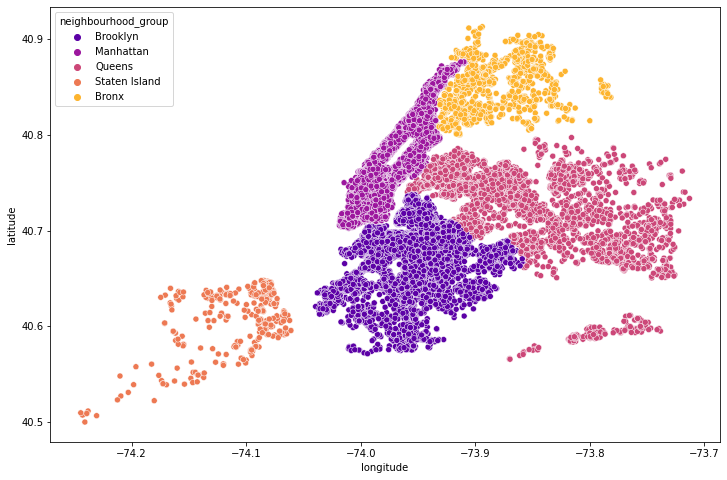

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group,palette="plasma")
plt.show()

price distribution

Text(0.5, 1.0, 'Price Distribution')

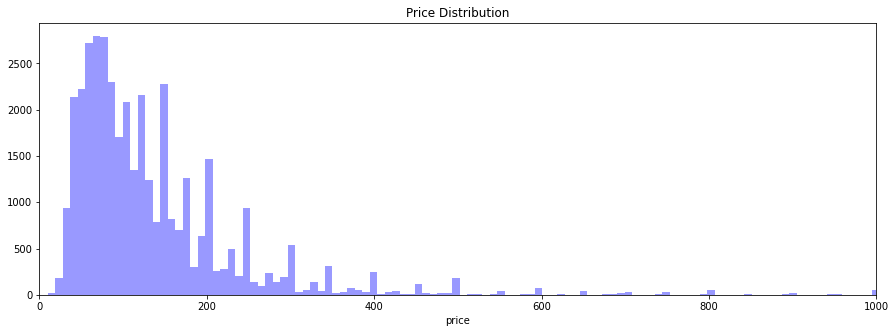

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(df['price'],hist=True, kde=False, bins=200, color='blue')
plt.xlim(0, 1000)
plt.title('Price Distribution')

 From the histogram plot, we see that most of the Airbnb rentals are priced below 200 dollars. The bin sizes for the plot on the right is  narrower compared to the plot on the left 

In [ ]:
price_df.groupby('neighbourhood_group')['price'].describe()


,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,87.496792,106.709349,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20104.0,124.383207,186.873538,0.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.875814,291.383183,0.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.517649,167.102155,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


Average price of properties in Manhattan is highest and Average price of properties in Bronx is lowest

Text(0.5, 1.0, 'Distribution of Prices in different Neighbourhood Groups')

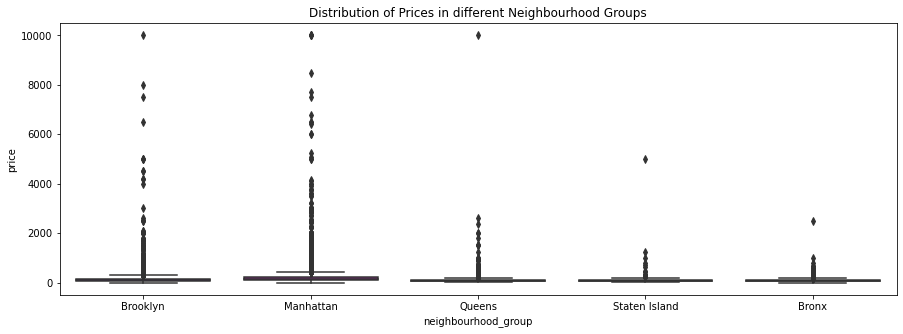

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=price_df, x='neighbourhood_group', y='price', palette="plasma")
plt.title('Distribution of Prices in different Neighbourhood Groups')

Text(0.5, 1.0, 'Distribution of Prices in different Neighbourhood Groups')

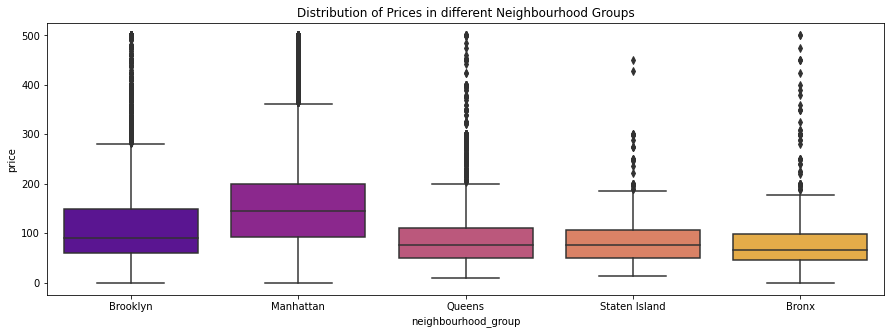

In [ ]:
#Removing skewed prices
plt.figure(figsize=(15,5))
sns.boxplot(data=price_df[price_df['price'] <= 500], x='neighbourhood_group', y='price', palette="plasma")
plt.title('Distribution of Prices in different Neighbourhood Groups')

Text(0.5, 1.0, 'Distribution of Prices in different Neighbourhood Groups')

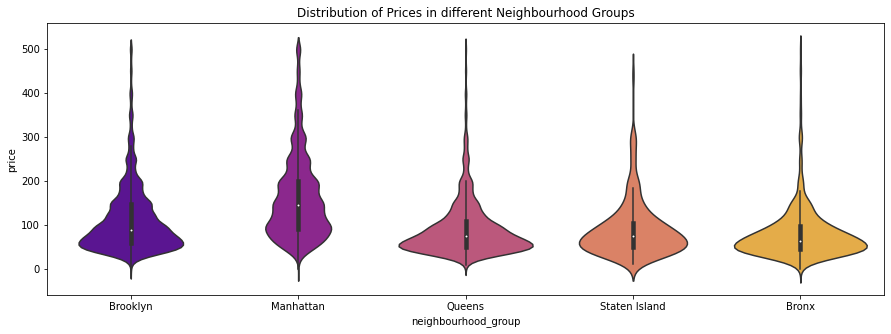

In [ ]:
#Removing skewed prices
plt.figure(figsize=(15,5))
sns.violinplot(data=price_df[price_df['price'] <= 500], x='neighbourhood_group', y='price', palette="plasma")
plt.title('Distribution of Prices in different Neighbourhood Groups')

price and room type

Text(0.5, 1.0, 'Distribution of Prices for different Room Types')

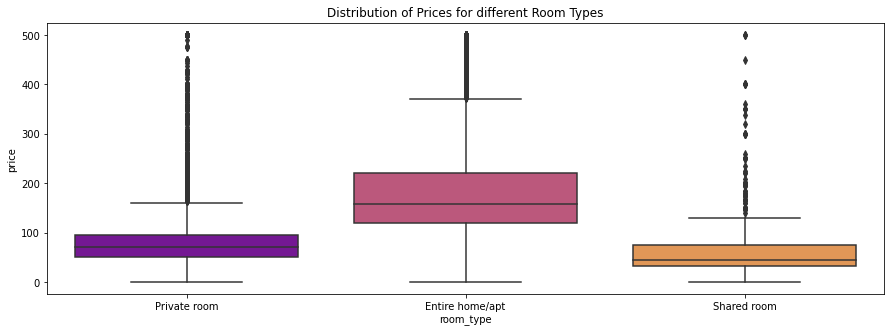

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df[df['price'] <= 500], x='room_type', y='price', palette="plasma")
plt.title('Distribution of Prices for different Room Types')

In [ ]:
#property listed in each neighbourhood
property_df=df.groupby('neighbourhood_group')['room_type'].value_counts()
property_df

neighbourhood_group  room_type      
Bronx                Private room         652
                     Entire home/apt      379
                     Shared room           60
Brooklyn             Private room       10132
                     Entire home/apt     9559
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Private room        3372
                     Entire home/apt     2096
                     Shared room          198
Staten Island        Private room         188
                     Entire home/apt      176
                     Shared room            9
Name: room_type, dtype: int64

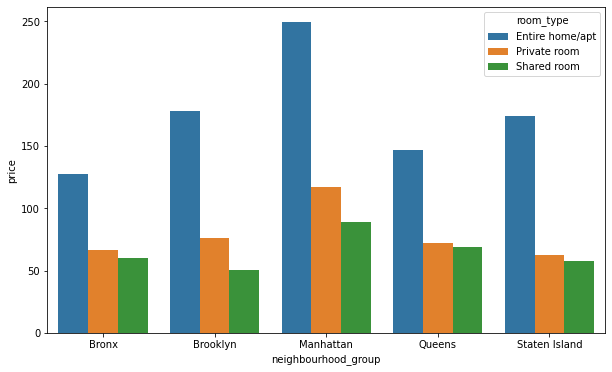

In [ ]:
plt.figure(figsize=(10,6))
mean_price_df = df.groupby(['neighbourhood_group', 'room_type'], as_index=False)[['price']].mean()
sns.barplot(data=mean_price_df, x='neighbourhood_group', y ='price', hue='room_type')

In [ ]:
#most expensive properties at neighbourhood for top10
df1 = df.groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",ascending=False).rename(index=str, columns={"price": "Average price per night"}).head(15)

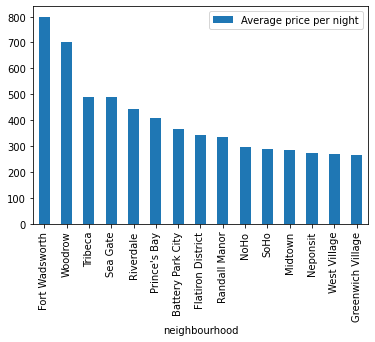

,Average price per night
neighbourhood,
Fort Wadsworth,800.000000
Woodrow,700.000000
Tribeca,490.638418
Sea Gate,487.857143
Riverdale,442.090909
Prince's Bay,409.500000
Battery Park City,367.557143
Flatiron District,341.925000
Randall Manor,336.000000


In [ ]:
df1.plot(kind='bar')
plt.show()
pd.DataFrame(df1)

In [ ]:
dfm=df[['neighbourhood_group','neighbourhood']]
dfm.set_index('neighbourhood_group')
dfm[dfm['neighbourhood']=='Fort Wadsworth']

,neighbourhood_group,neighbourhood
25386,Staten Island,Fort Wadsworth


 analysis from graph Fort Wadsworth of statenisland neighbourhood group having most expensive price

**different room types available  by most of  host with respective neighbourhood ** 

In [ ]:
df2=df.groupby(['room_type','neighbourhood_group'])['host_id'].value_counts()
type(df2)

pandas.core.series.Series

<Figure size 1440x432 with 0 Axes>

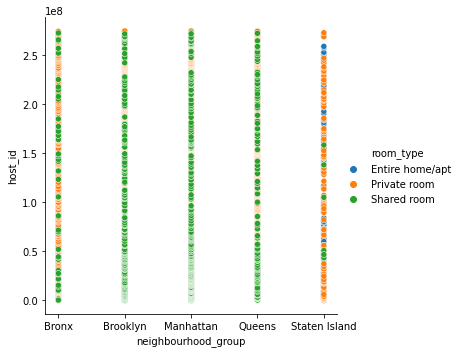

In [ ]:
plt.figure(figsize=(20,6))
sns.relplot(x ='neighbourhood_group',y='host_id',hue='room_type' ,data = df2);

In [ ]:
corr1 = df.corr()

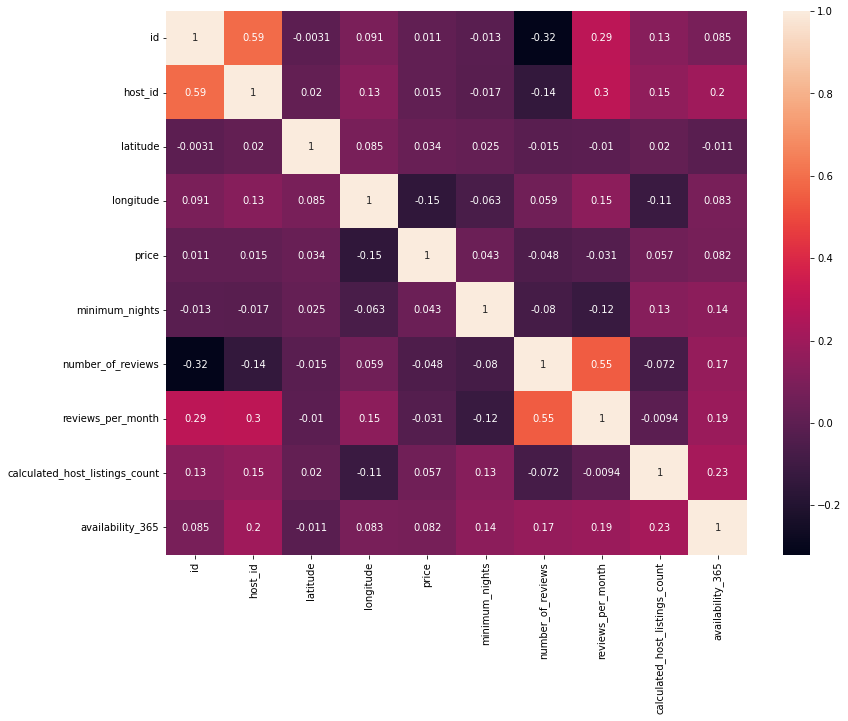

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(corr1, annot=True)


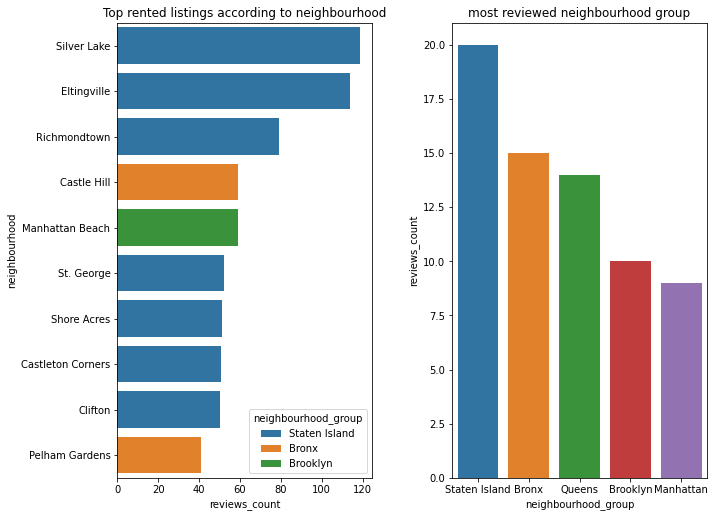

In [ ]:
# since 'review_counts' have many outliers, we should use median instead of mean as the measure 

top_listings = df.groupby('neighbourhood_group').median().sort_values(by = 'reviews_count', ascending = False).reset_index()
top10_listings = df.groupby(['neighbourhood_group', 'neighbourhood']).median().sort_values(by = 'reviews_count', ascending = False).reset_index().head(10)

fig, axis = plt.subplots(1, 2, figsize = (10, 8), squeeze = True)
fig.tight_layout(pad = 5)
sns.barplot(x = 'reviews_count', y = 'neighbourhood', data = top10_listings, orient = 'h', hue = 'neighbourhood_group', dodge = False,  ci = False,ax = axis[0]).set(title = 'Top rented listings according to neighbourhood')
sns.barplot(x = 'neighbourhood_group', y = 'reviews_count', data = top_listings, dodge = False, ci = False, ax = axis[1]).set(title = 'most reviewed neighbourhood group')
plt.show()

## From the below observations, we can conclude that hosts in Staten Island are the most busy, in terms of getting customers
## Silver Lake, Eltingville and Richmondtown seems to be the top 3 hotspots for hosts to get many customers

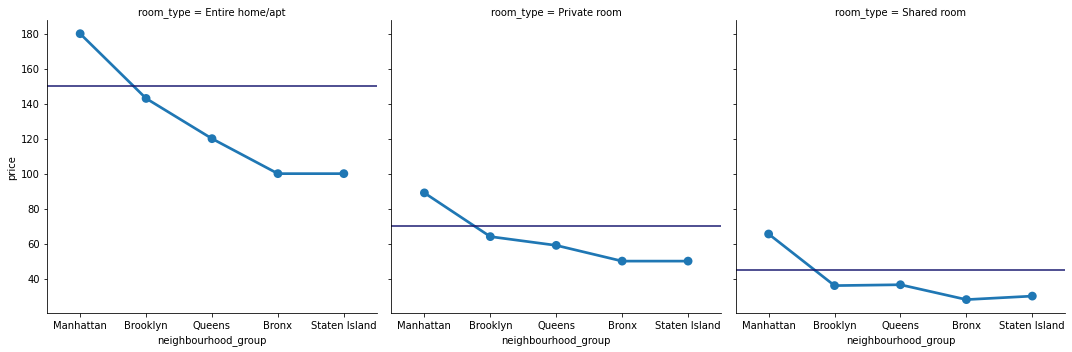

In [ ]:
# inspect the price differences for each neighbourhoood
avg_roomtype_cost = df.groupby('room_type').price.median()
top_price = df.groupby(['neighbourhood_group', 'room_type']).median().sort_values(by = 'price', ascending = False).reset_index()

g = sns.catplot(x = 'neighbourhood_group', y = 'price', data = top_price, ci = False, kind = 'point', col = 'room_type')

for i in range(len(avg_roomtype_cost)):
    g.axes[0][i].axhline(avg_roomtype_cost[i], color = 'midnightblue')

plt.show()

# as we can see, Manhattan has the most expensive listing offers for all room_types
# on the other hand, Staten Island has the cheapest listings. This further reinforces the previous observations we made as to why each Staten Island hosts get alot of customers.


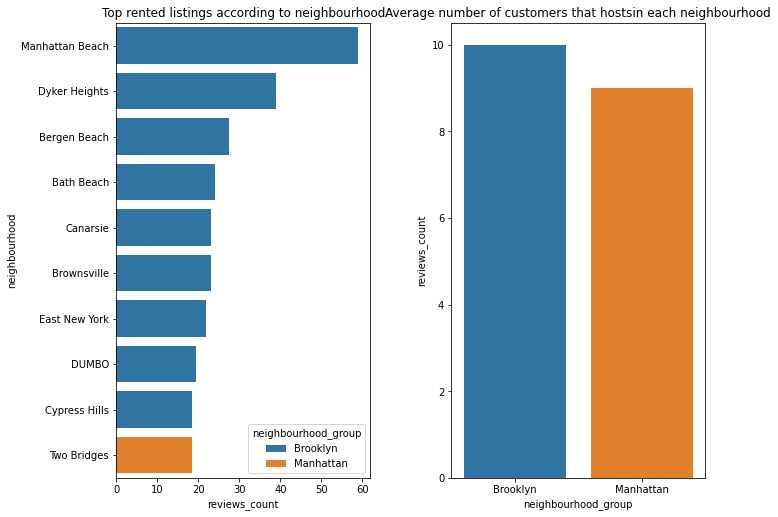

In [ ]:
# Investigate which hosts in Manhattan & Brooklyn have the most customers as they have the highest listing

top_listings = df.loc[(df.neighbourhood_group == 'Manhattan') | (df.neighbourhood_group == 'Brooklyn')].groupby('neighbourhood_group').median().sort_values(by = 'reviews_count', ascending = False).reset_index()
top10_listings = df.loc[(df.neighbourhood_group == 'Manhattan') | (df.neighbourhood_group == 'Brooklyn')].groupby(['neighbourhood_group', 'neighbourhood']).median().sort_values(by = 'reviews_count', ascending = False).reset_index().head(10)

fig, axis = plt.subplots(1, 2, figsize = (10, 8), squeeze = True)
fig.tight_layout(pad = 5)
sns.barplot(x = 'reviews_count', y = 'neighbourhood', data = top10_listings, orient = 'h', ci = False, hue = 'neighbourhood_group', dodge = False, ax = axis[0], estimator = np.median).set(title = 'Top rented listings according to neighbourhood')
sns.barplot(x = 'neighbourhood_group', y = 'reviews_count', data = top_listings, ci = False, dodge = False, ax = axis[1]).set(title = 'Average number of customers that hostsin each neighbourhood')
plt.show()

# Brooklyn hosts tops this one, with Manhattan Beach, Dyker Heights & Bergen Beach being the common locations

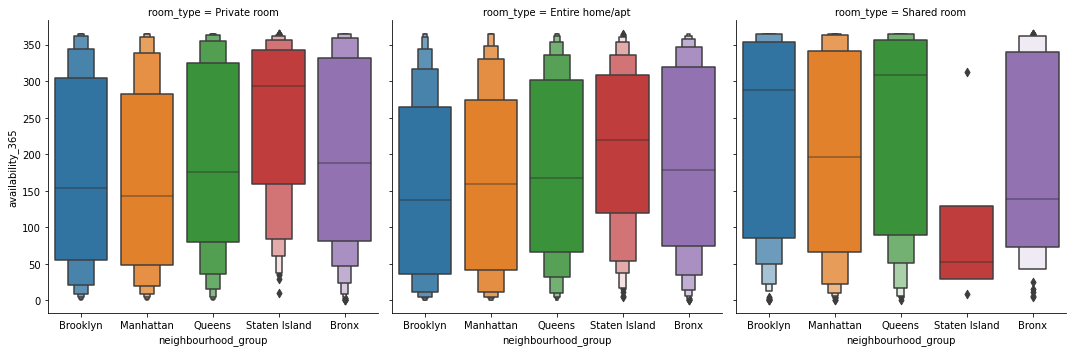

In [ ]:
# inspect the availability of listings according to each neighbourhood and room type

sns.catplot(x = 'neighbourhood_group', y = 'availability_365', data = df.loc[df.availability_365 > 0], ci = False, estimator = np.median, kind = 'boxen', col = 'room_type')

## For private rooms, most Staten Island listings have them available throughout the whole year compared to the other boroughs.
## Entire homes in NYC are generally not available for the whole year, and more towards the 6 months mark.
## For shared rooms, Brooklyn & Queens have them available through out most of the year, while Staten Island and Bronx have them for only a couple months in a year.

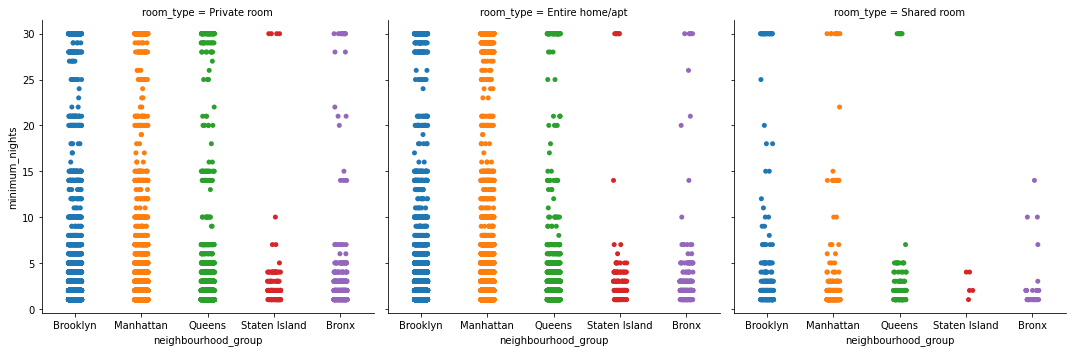

In [ ]:
# inspect the minimum nights for listings in terms of room type and borough
# consider those that are 30 days or less, since higher is more uncommon in general
sns.catplot(x = 'neighbourhood_group', y = 'minimum_nights', data = df.loc[df.minimum_nights <= 30], ci = False, estimator = np.median, kind = 'strip', col = 'room_type')

## Staten Island listings tend to have very low minimum night requirements, which means that many vistors do not have to stay for long.

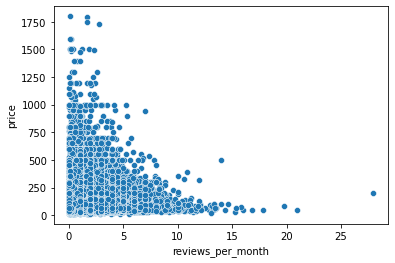

In [ ]:
# view the trend for reviews per month against price. Ignore rates above 30 as they could potentially be invalid.

sns.scatterplot(x = 'reviews_per_month', y = 'price', data = df.loc[(df.reviews_count > 0) & (df.reviews_per_month <= 30)].sort_values('reviews_count', ascending = False))

# exponential trend where extreme high prices have a very low review rate while lower prices have a variety of rates.

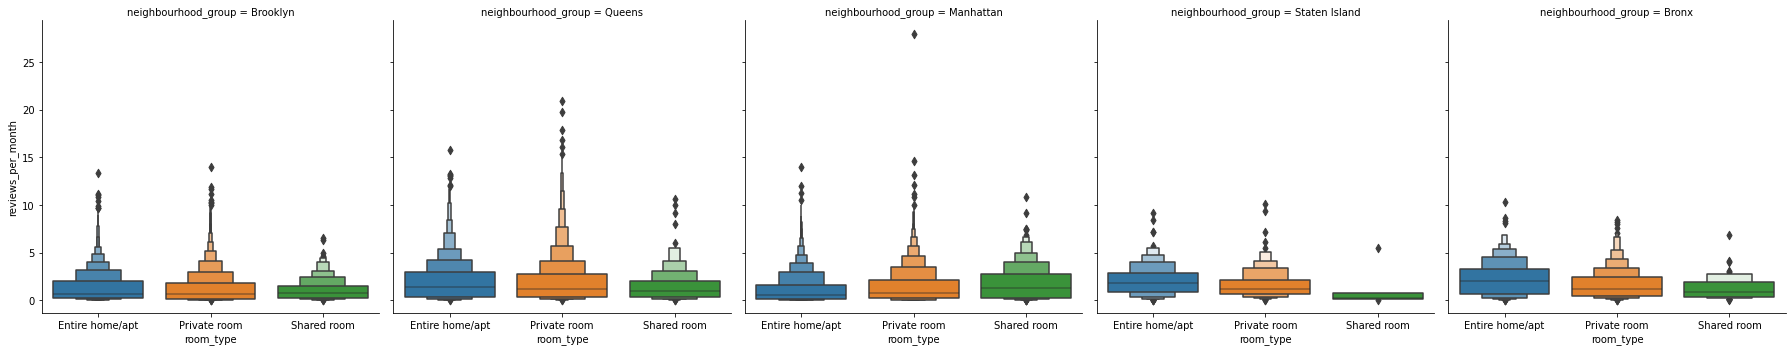

In [ ]:
# inspect the review rate for each room type in the different boroughs

sns.catplot(x = 'room_type', y = 'reviews_per_month', data = df.loc[(df.reviews_count > 0) & (df.reviews_per_month <= 30)].sort_values('reviews_count', ascending = False), ci = False, estimator = np.median, kind = 'boxen', col = 'neighbourhood_group')

## Althoough Manhattan has alot of private rooms & entire homes available, many people tend to opt for the shared rooms.
## Entire homes seem to be the go to option for most visitors in Staten Island and Queens

Conclusions:

1)most preferred type is entire home/apt

2)we can see, Manhattan has the most expensive listing offers for all room_types
on the other hand, Staten Island has the cheapest listings.

3)we can conclude that hosts in Staten Island are the most busy, in terms of getting customers

4) Silver Lake, Eltingville and Richmondtown seems to be the top 3 hotspots for hosts to get many customers

5)For private rooms, most Staten Island listings have them available throughout the whole year compared to the other neighbourhood.

6)Entire homes in NYC are generally not available for the whole year, and more towards the 6 months mark.

7) For shared rooms, Brooklyn & Queens have them available through out most of the year, while Staten Island and Bronx have them for only a couple months in a year.

8)Althoough Manhattan has alot of private rooms & entire homes available, many people tend to opt for the shared rooms.

9) Entire homes seem to be the go to option for most visitors in Staten Island and Queens

================================================================================
at last we can conclude with respective to objective future expansion can be done in roomtype entirehome/apt ,but in staten Island considering demand and in terms of price range with respect to  shared rooms be made available 